(400, 4096)


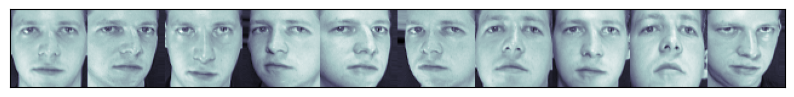

[0 0 0 0 0 0 0 0 0 0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [1]:
# Retrieve and load the Olivetti faces dataset
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load the Olivetti faces dataset
faces = fetch_olivetti_faces()

# Convert the faces data to a numpy array
faces_data = faces.data
print(faces_data.shape)

# Display the first 10 faces in a single plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5),
                       subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(np.hstack(faces_data[:10].reshape(-1, 64, 64)), cmap='bone')
plt.show()

# Display the target labels
print(faces.target[:10])

# Display all the unique labels
print(np.unique(faces.target))



In [2]:
# Split the training set, a validation set, and a test set using stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(split.split(faces_data, faces.target))
X_train_valid, X_test = faces_data[train_valid_idx], faces_data[test_idx]
y_train_valid, y_test = faces.target[train_valid_idx], faces.target[test_idx]
X_test = faces_data[test_idx]
y_test = faces.target[test_idx]

split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

print(X_train.shape, y_train.shape) # Training set
print(X_valid.shape, y_valid.shape) # Validation set
print(X_test.shape, y_test.shape) # Test set

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


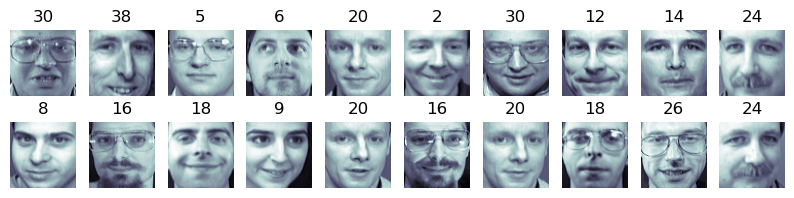

In [3]:
def plot_faces(faces, labels, n_cols=10):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap='bone')
        plt.axis('off')
        plt.title(label)
    plt.show()

plot_faces(X_train[:20].reshape(-1,64,64), y_train)

Cross-validation scores: [0.94642857 0.92857143 0.94642857 0.94642857 0.91071429]
Mean accuracy: 0.9357142857142856
Validation accuracy: 0.975
Test accuracy: 0.975
Predicted label: 3
Actual label: 3


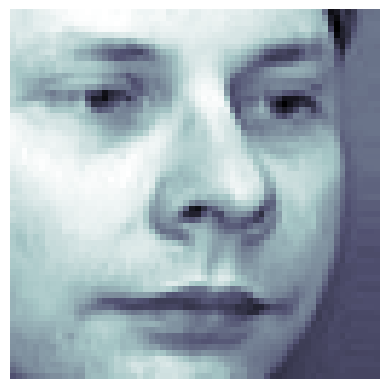

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

# Set up k-fold cross-validation
k = 5
skf = StratifiedKFold(n_splits=k)

# Initialize the classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Perform k-fold cross-validation
cross_val_scores = cross_val_score(svm_clf, X_train, y_train, cv=skf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean accuracy: {cross_val_scores.mean()}")

# Train the classifier on the training set and evaluate it on the validation set
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_valid)
validation_accuracy = accuracy_score(y_valid, y_pred)

print(f"Validation accuracy: {validation_accuracy}")

# Test the classifier on the test set
y_pred = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy}")

# Try to predict one image vs actual label
index = 0
y_pred = svm_clf.predict([X_test[index]])
print(f"Predicted label: {y_pred[0]}")
print(f"Actual label: {y_test[index]}")

# Display the image
plt.imshow(X_test[index].reshape(64, 64), cmap='bone')
plt.axis('off')
plt.show()

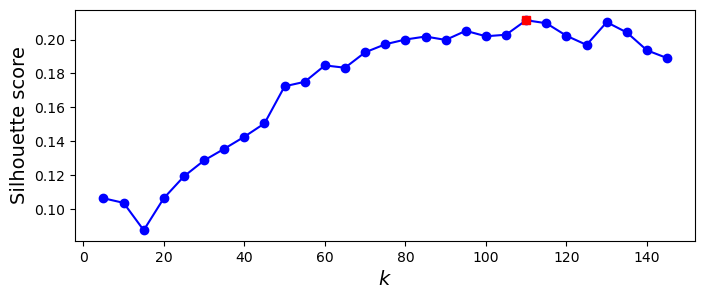

In [12]:
# Cluster images using KMeans
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_train)
    kmeans_per_k.append(kmeans)

# Calculate sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [8]:
best_k

110

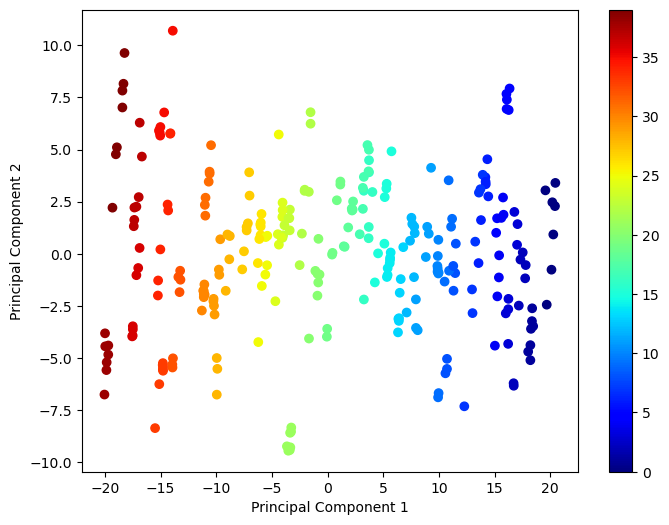

In [25]:
# Use pca to reduce dimensionality
from sklearn.decomposition import PCA

olivetti_train = np.c_[X_train, y_train]
olivetti_train_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(olivetti_train)

plt.figure(figsize=(8, 6))
plt.scatter(olivetti_train_pca_reduced[:, 0], olivetti_train_pca_reduced[:, 1], c=y_train, cmap='jet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [17]:
import plotly.express as px
import pandas as pd

olivetti_train_pca3_reduced = PCA(n_components=3, random_state=42).fit_transform(olivetti_train)
df_pca_3 = pd.DataFrame(olivetti_train_pca3_reduced, 
                        columns=['PC1', 
                                 'PC2', 
                                 'PC3'])

fig = px.scatter_3d(df_pca_3, x='PC1', 
                    y='PC2', 
                    z='PC3').update_traces(marker= dict(color= '#C00000'))
fig.show()

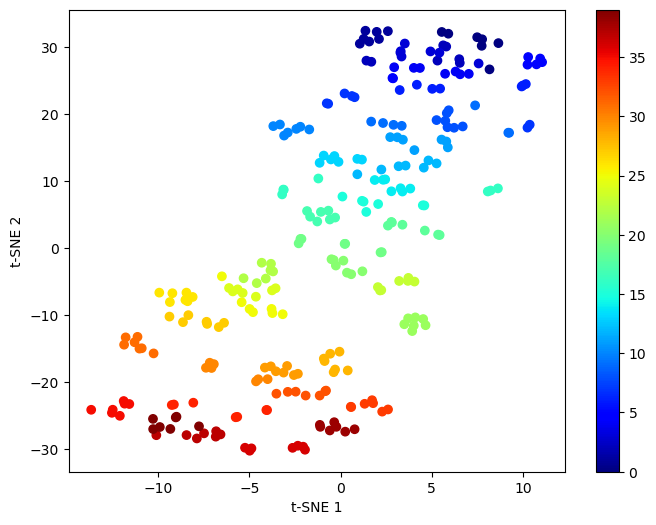

In [23]:
from sklearn.manifold import TSNE

olivetti_train_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(olivetti_train)

plt.figure(figsize=(8, 6))
plt.scatter(olivetti_train_tsne_reduced[:, 0], olivetti_train_tsne_reduced[:, 1], c=y_train, cmap='jet')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()
plt.show()

In [26]:
# Use Gaussian Mixture Model to cluster the images

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=40, random_state=42)
gmm.fit(X_train)